In [2]:
%reload_ext_ autoreload
%autoreload 2
%matplotlib inline

UsageError: Line magic function `%reload_ext_` not found.


In [0]:
from fastai import *
from fastai.vision import *

In [4]:
path = untar_data(URLs.PETS)

In [5]:
path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [6]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

In [0]:
path_anno = path/'annotations'
path_img = path/'images'

In [8]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_166.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/german_shorthaired_195.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/pomeranian_1.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_171.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Bombay_137.jpg')]

In [0]:
np.random.seed(2)
pat= r'/([^/]+)_\d+.jpg$' # to extract labels 

In [10]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size = 224) # we fix a particular size (224*224) of images to accelerate the functionality of the GPU (will be faster)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Abyssinian,german_shorthaired,pomeranian,basset_hound,japanese_chin
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Egyptian_Mau,Ragdoll,leonberger,Egyptian_Mau,wheaten_terrier
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

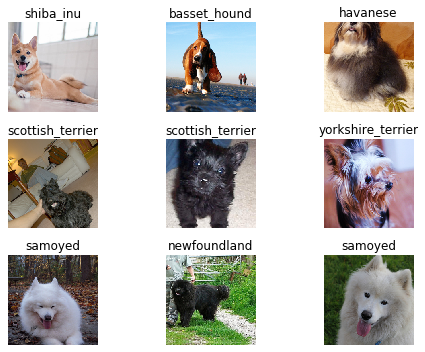

In [11]:
data.show_batch(rows=3,figsize=(7,5))

In [12]:

print(data.classes)
len(data.classes)

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


37

In [0]:
# Training ResNet34

In [14]:
learn = Learner(data, models.resnet34(pretrained=True), metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [16]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.869483,3.465170,0.826116,52:58
1,1.498611,2.811214,0.583897,50:28
2,0.910595,0.778584,0.239513,51:36
3,0.483430,0.443501,0.137348,51:12


In [0]:
learn.save('stage-1-')

In [18]:
interp = ClassificationInterpretation.from_learner(learn)

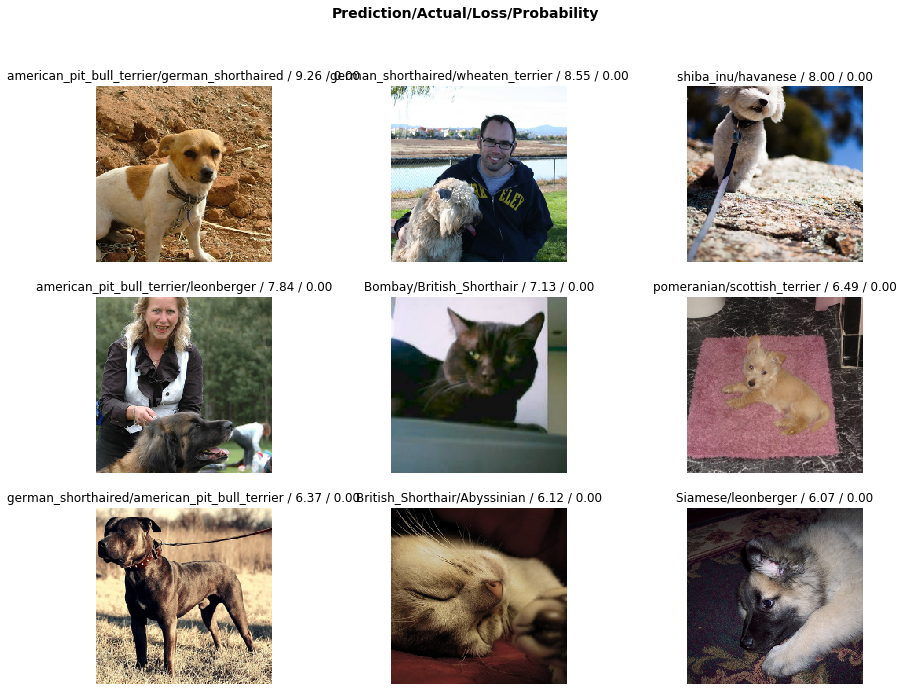

In [20]:
interp.plot_top_losses(9, figsize=(15,11))

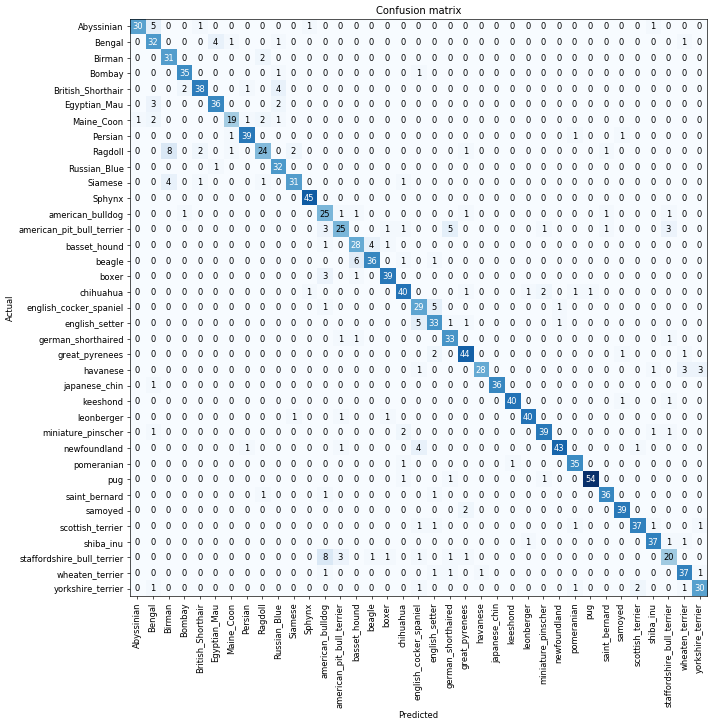

In [21]:

interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [30]:
interp.most_confused(min_val=2)

[('Ragdoll', 'Birman', 8),
 ('staffordshire_bull_terrier', 'american_bulldog', 8),
 ('beagle', 'basset_hound', 6),
 ('Abyssinian', 'Bengal', 5),
 ('american_pit_bull_terrier', 'german_shorthaired', 5),
 ('english_cocker_spaniel', 'english_setter', 5),
 ('english_setter', 'english_cocker_spaniel', 5),
 ('Bengal', 'Egyptian_Mau', 4),
 ('British_Shorthair', 'Russian_Blue', 4),
 ('Siamese', 'Birman', 4),
 ('basset_hound', 'beagle', 4),
 ('newfoundland', 'english_cocker_spaniel', 4),
 ('Egyptian_Mau', 'Bengal', 3),
 ('american_pit_bull_terrier', 'american_bulldog', 3),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 3),
 ('boxer', 'american_bulldog', 3),
 ('havanese', 'wheaten_terrier', 3),
 ('havanese', 'yorkshire_terrier', 3),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 3),
 ('Birman', 'Ragdoll', 2),
 ('British_Shorthair', 'Bombay', 2),
 ('Egyptian_Mau', 'Russian_Blue', 2),
 ('Maine_Coon', 'Bengal', 2),
 ('Maine_Coon', 'Ragdoll', 2),
 ('Ragdoll', 'British_Sho

In [0]:
# Unfreezing , Fine-tuning 

In [0]:
learn.unfreeze() # To train the whole model not just the last layers

In [34]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.248275,0.833522,0.258457,51:11


In [36]:
learn.load('stage-1-')

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Abyssinian,german_shorthaired,pomeranian,basset_hound,japanese_chin
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Egyptian_Mau,Ragdoll,leonberger,Egyptian_Mau,wheaten_terrier
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None, model=ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(

In [37]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


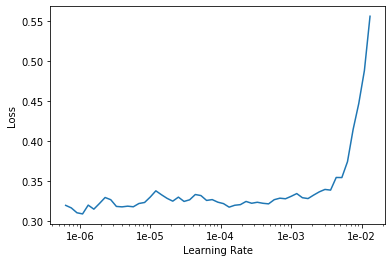

In [38]:
learn.recorder.plot()

In [43]:
learn.fit_one_cycle(1, max_lr=slice(1e-06,1e-04))

ZeroDivisionError: ignored